In [7]:
# Import pandas
import pandas as pd

# Specify the path to your text file
file_path = 'C:\\Users\\User\\SDA490\\VancouverFinal'

# Read the text file and create a DataFrame
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    # Strip newline characters from each line
    lines = [line.strip() for line in lines if line.strip()]

# Create a DataFrame with a single column "text"
df = pd.DataFrame(lines, columns=['text'])

# Display the first few entries to verify
print(df.head())

                                                text
0  Housing is diabolical and nobody can afford th...
1  1 bedrooms in the suburbs are going for $2500....
2  Don’t recommend moving here. Not only is it ex...
3       I love this city, I hope I die in this city.
4   I don't recommend coming to this city right now.


In [8]:
# Strip leading and trailing spaces from the text column
df['text'] = df['text'].str.strip()

# Remove rows where 'text' is empty after stripping spaces
df = df[df['text'] != '']

# Optionally, remove rows with NaN values if any
df.dropna(subset=['text'], inplace=True)

# Replace multiple spaces with a single space
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

# Display the cleaned DataFrame to verify the changes
print(df.head())


                                                text
0  Housing is diabolical and nobody can afford th...
1  1 bedrooms in the suburbs are going for $2500....
2  Don’t recommend moving here. Not only is it ex...
3       I love this city, I hope I die in this city.
4   I don't recommend coming to this city right now.


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each post
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Determine the overall sentiment based on the compound score
df['overall_sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Example output
print(df[['text', 'overall_sentiment']])


                                                  text overall_sentiment
0    Housing is diabolical and nobody can afford th...          positive
1    1 bedrooms in the suburbs are going for $2500....          negative
2    Don’t recommend moving here. Not only is it ex...          positive
3         I love this city, I hope I die in this city.          positive
4     I don't recommend coming to this city right now.          negative
..                                                 ...               ...
808  "Doesn't seem to include Australia with house ...          positive
809  "New Zealander feeling left out here. House pr...          negative
810  "Ok not really pertinent, but I thought it sai...          positive
811  "Even renting a shithole apt is out of price i...           neutral
812         "I’m Canadian and I approve this message."           neutral

[813 rows x 2 columns]


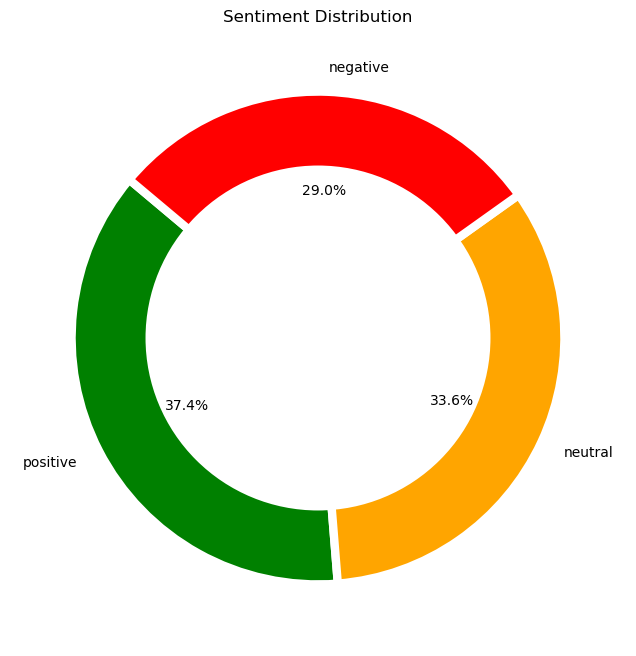

In [10]:
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and 'overall_sentiment' is the column with sentiment categories
sentiment_counts = df['overall_sentiment'].value_counts()

# Define the colors to match the screenshot example
colors = ['green', 'orange', 'red']  # Adjust the colors to match your desired output

# Create a pie chart with a hole in the middle
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'linewidth': 6, 'edgecolor': 'white'})  # Adjust 'linewidth' to control the size of the hole

# Draw a circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Sentiment Distribution')
plt.show()

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from collections import Counter

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in df['tokens'].tolist() for token in sublist]
token_counts = Counter(all_tokens)

# Display the most common terms
print(token_counts.most_common(50))

[('people', 83), ('vancouver', 80), ('rent', 66), ('one', 57), ('move', 56), ('housing', 54), ('like', 54), ('get', 53), ('living', 52), ('city', 49), ('even', 47), ('years', 44), ('place', 42), ('going', 41), ('bedroom', 40), ('live', 36), ('canada', 36), ('go', 35), ('afford', 34), ('would', 34), ('much', 34), ('bed', 34), ('expensive', 33), ('work', 33), ('good', 33), ('new', 33), ('house', 33), ('want', 32), ('prices', 32), ('make', 31), ('back', 31), ('find', 30), ('moved', 30), ('also', 30), ('home', 30), ('know', 30), ('time', 29), ('could', 29), ('pay', 29), ('still', 28), ('think', 28), ('month', 27), ('less', 26), ('better', 26), ('need', 26), ('way', 25), ('things', 25), ('many', 25), ('life', 25), ('never', 25)]


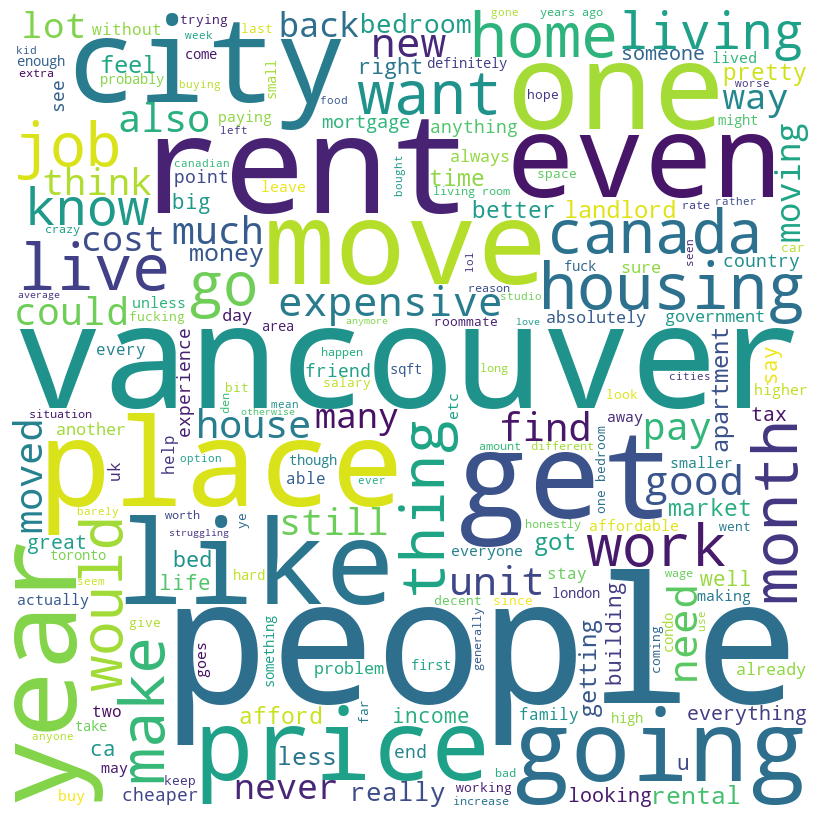

In [12]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(' '.join(all_tokens))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()